In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('life_exp.csv')
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [5]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [6]:
df.isnull().sum().sum()

2563

In [7]:
null_df = pd.DataFrame({'col_names':df.columns,'null_values': df.isnull().sum()}).reset_index(drop=True)
null_df

,col_names,null_values
0,Country,0
1,Year,0
2,Status,0
3,Lifeexpectancy,10
4,AdultMortality,10
5,infantdeaths,0
6,Alcohol,194
7,percentageexpenditure,0
8,HepatitisB,553
9,Measles,0


In [8]:
with_nulls = null_df[null_df['null_values']!=0]
with_nulls

,col_names,null_values
3,Lifeexpectancy,10
4,AdultMortality,10
6,Alcohol,194
8,HepatitisB,553
10,BMI,34
12,Polio,19
13,Totalexpenditure,226
14,Diphtheria,19
16,GDP,448
17,Population,652


In [9]:
null_list = with_nulls.iloc[:,0].tolist()
null_list

['Lifeexpectancy',
 'AdultMortality',
 'Alcohol',
 'HepatitisB',
 'BMI',
 'Polio',
 'Totalexpenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'thinness1-19years',
 'thinness5-9years',
 'Incomecompositionofresources',
 'Schooling']

In [10]:
df[null_list].describe()

,Lifeexpectancy,AdultMortality,Alcohol,HepatitisB,BMI,Polio,Totalexpenditure,Diphtheria,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2928.000000,2928.000000,2744.000000,2385.000000,2904.000000,2919.000000,2712.00000,2919.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,4.602861,80.940461,38.321247,82.550188,5.93819,82.324084,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,4.052413,25.070016,20.044034,23.428046,2.49832,23.716912,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.010000,1.000000,1.000000,3.000000,0.37000,2.000000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.877500,77.000000,19.300000,78.000000,4.26000,78.000000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.755000,92.000000,43.500000,93.000000,5.75500,93.000000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,7.702500,97.000000,56.200000,97.000000,7.49250,97.000000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,17.870000,99.000000,87.300000,99.000000,17.60000,99.000000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [11]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [12]:
df['Country'].dtype

dtype('O')

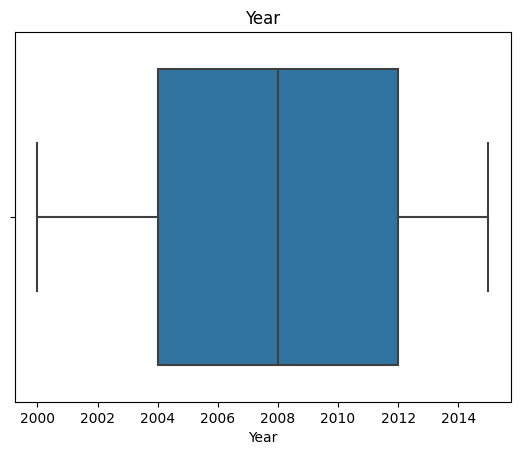

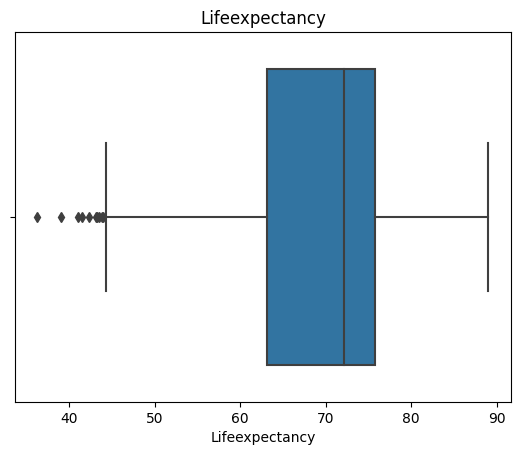

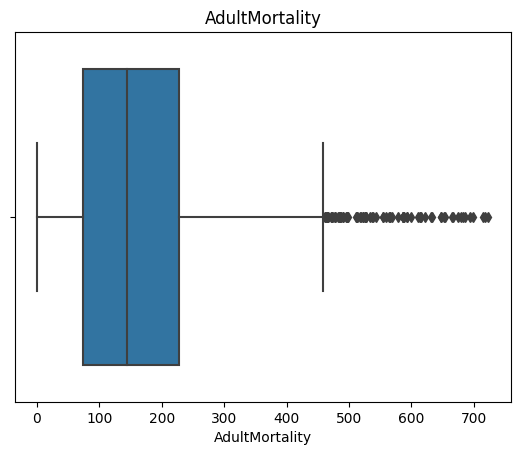

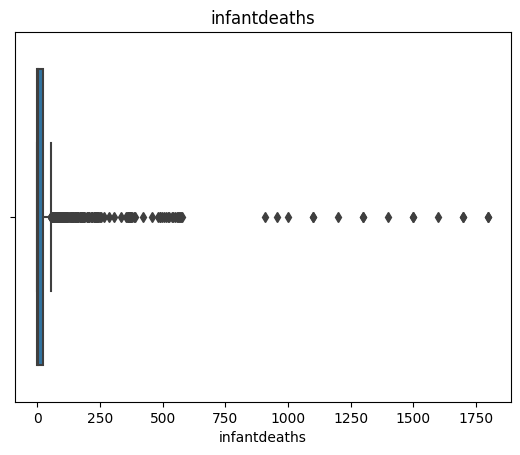

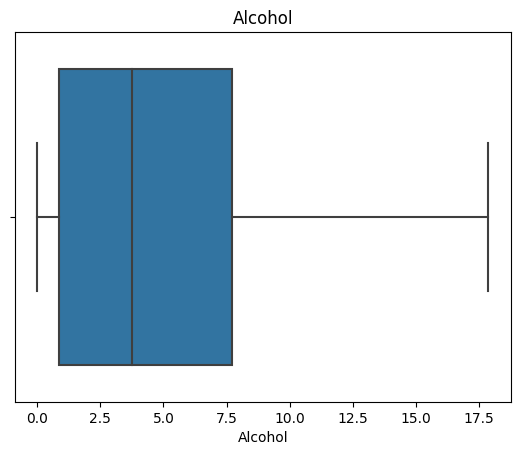

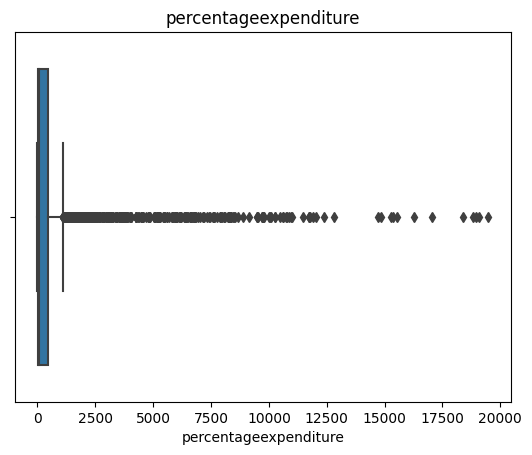

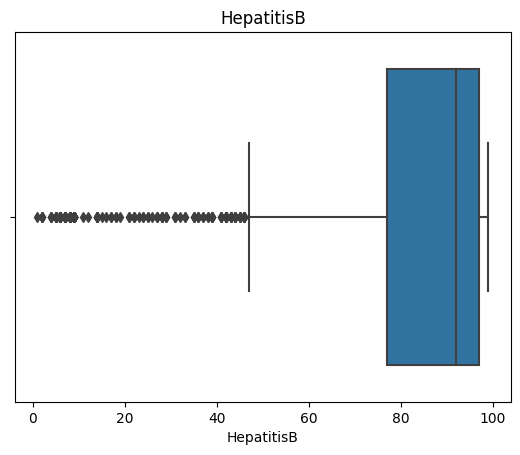

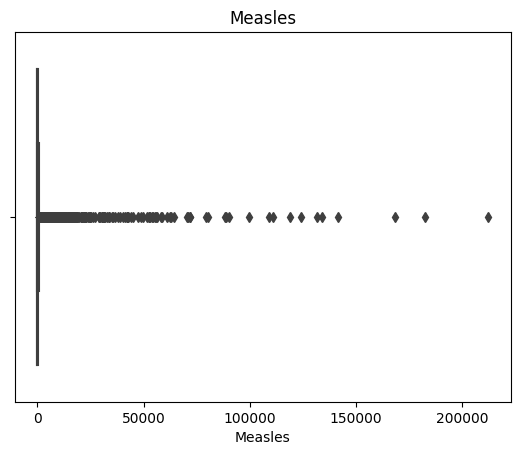

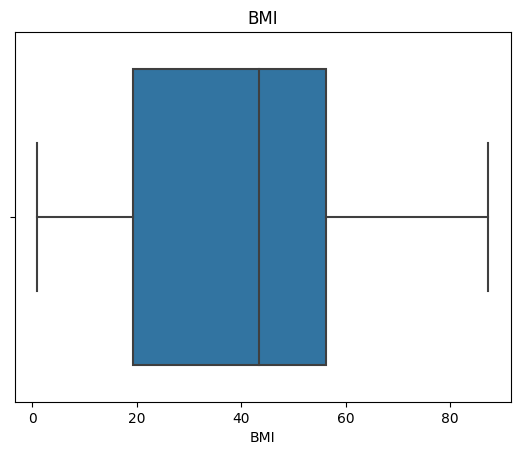

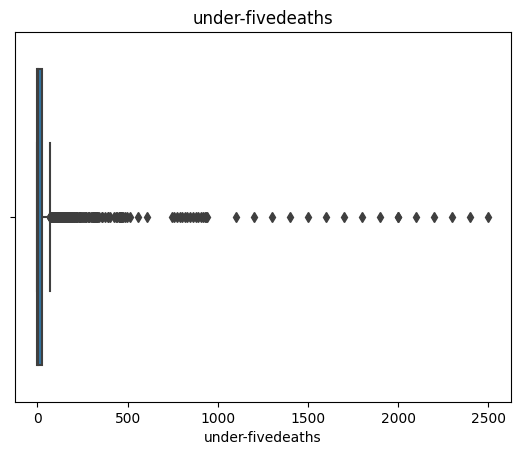

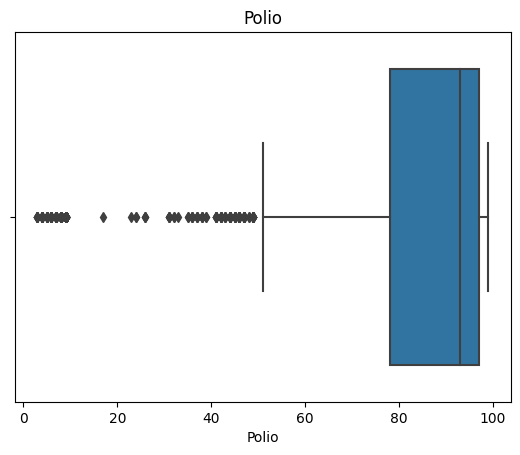

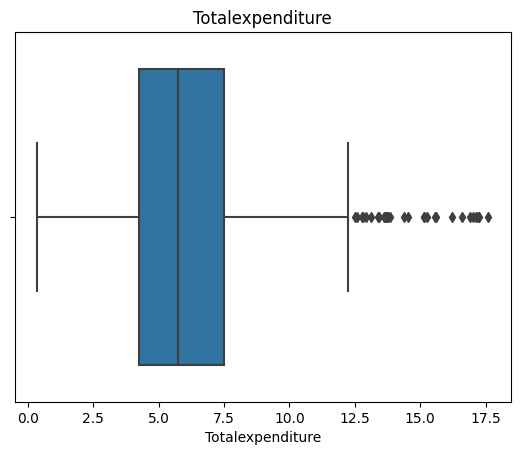

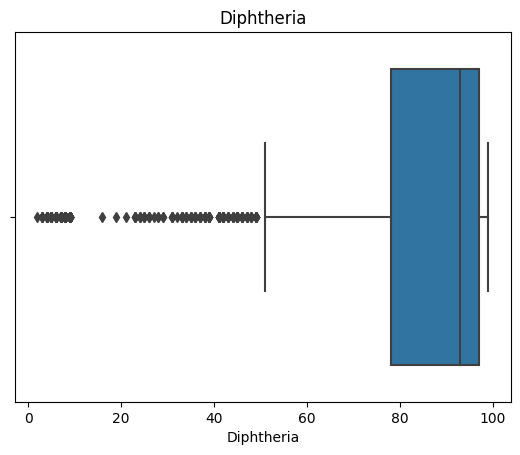

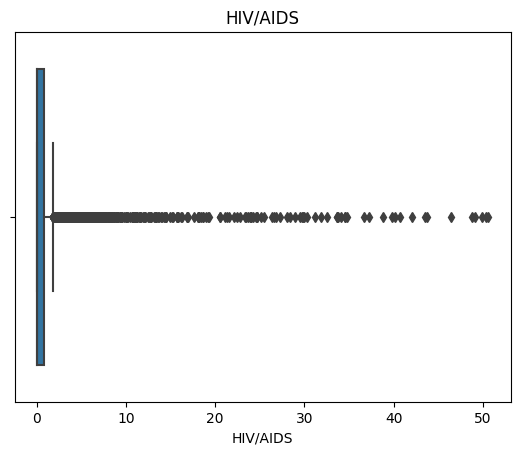

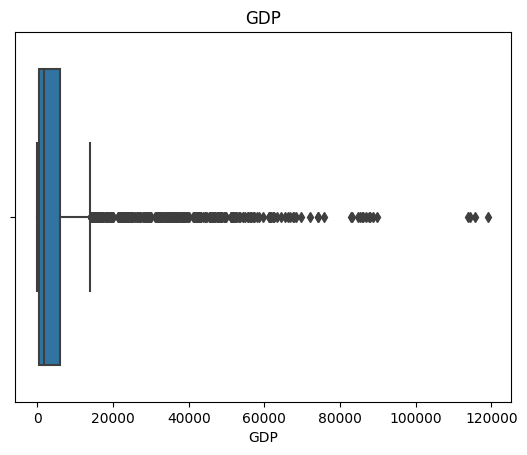

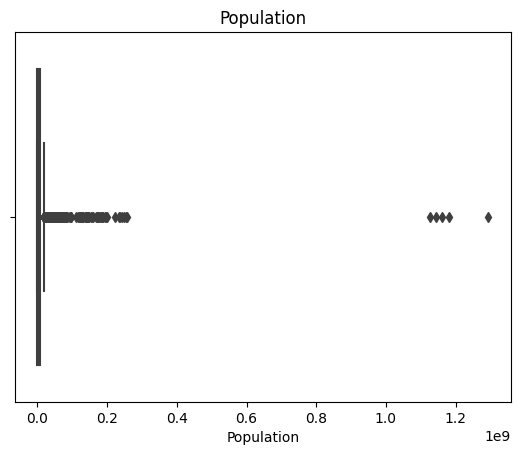

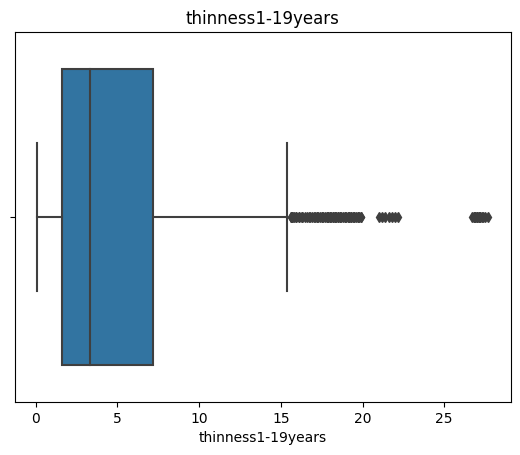

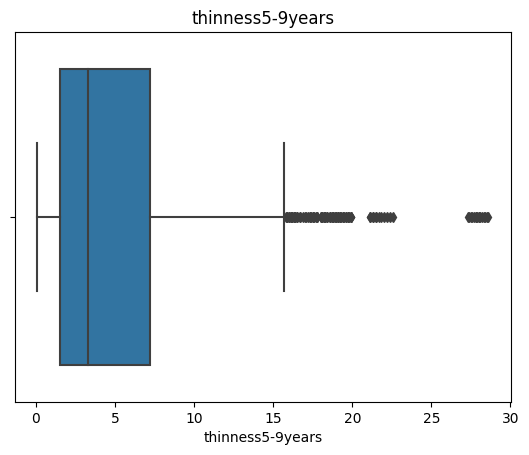

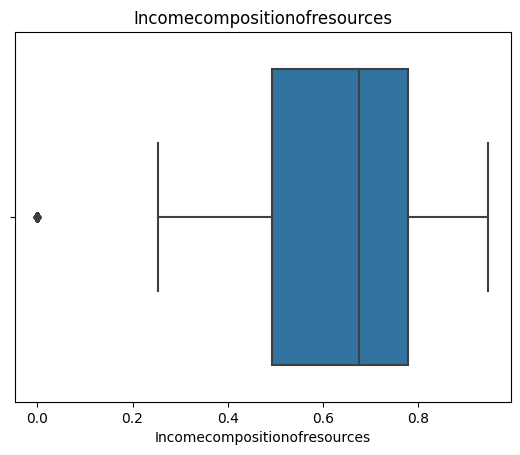

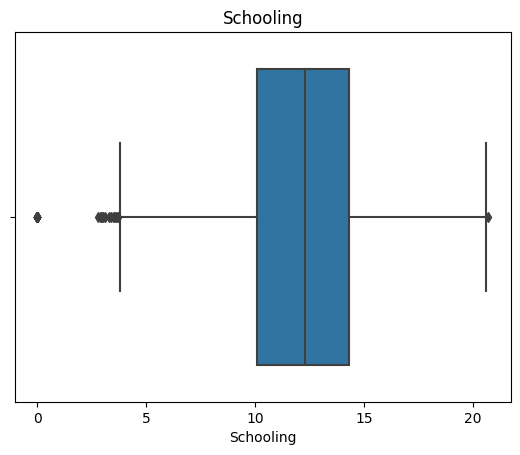

In [13]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(x=col,data=df)
        plt.title(col)
        plt.show()

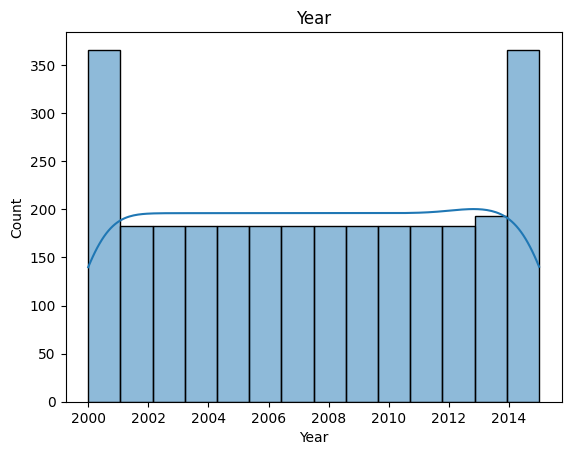

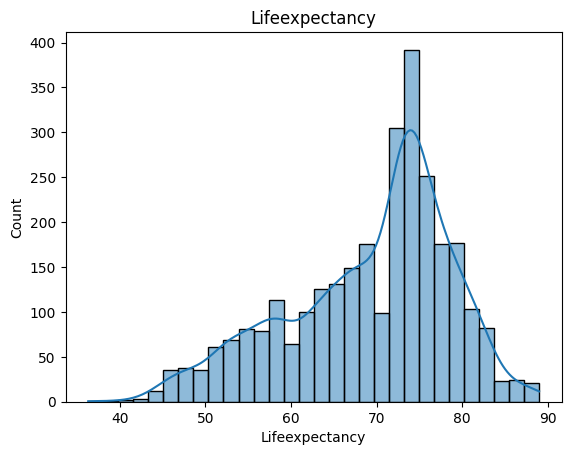

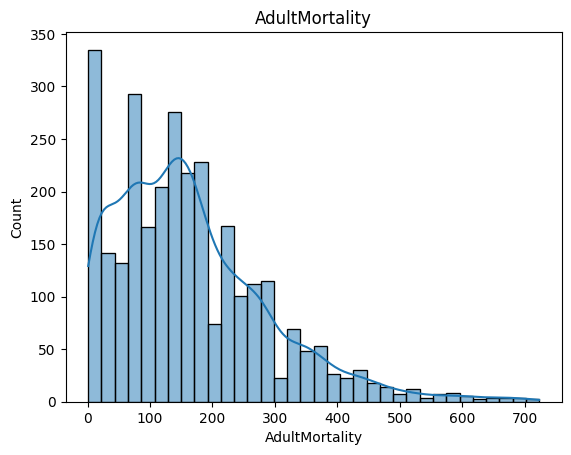

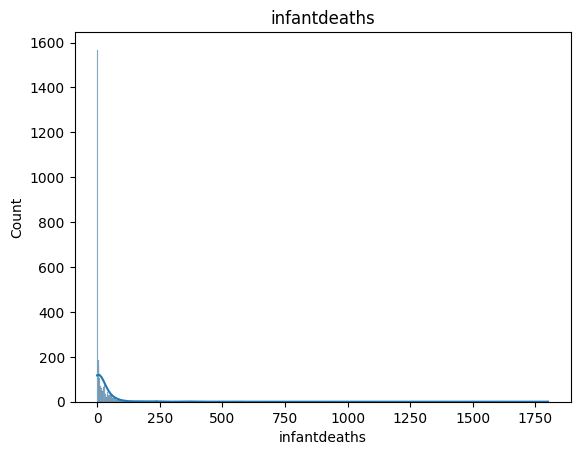

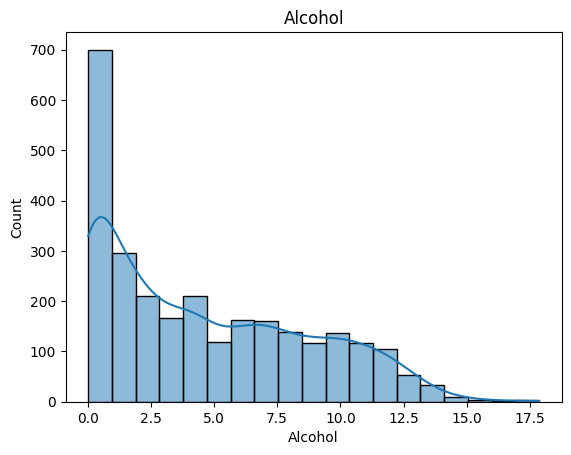

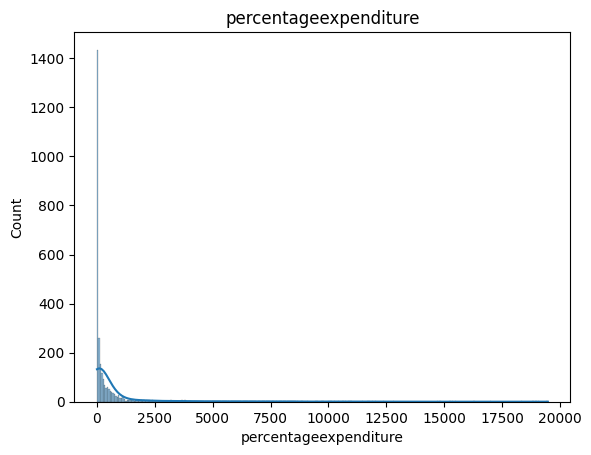

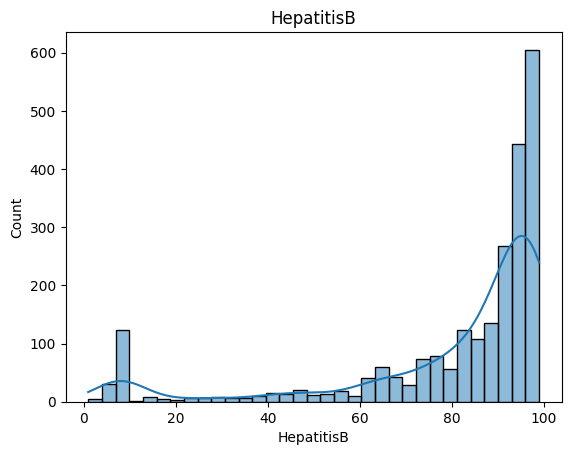

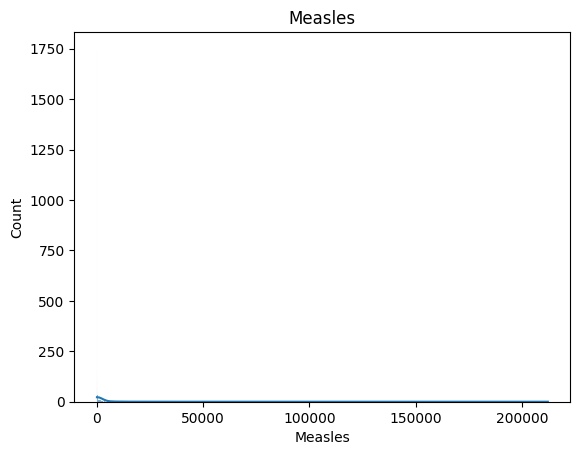

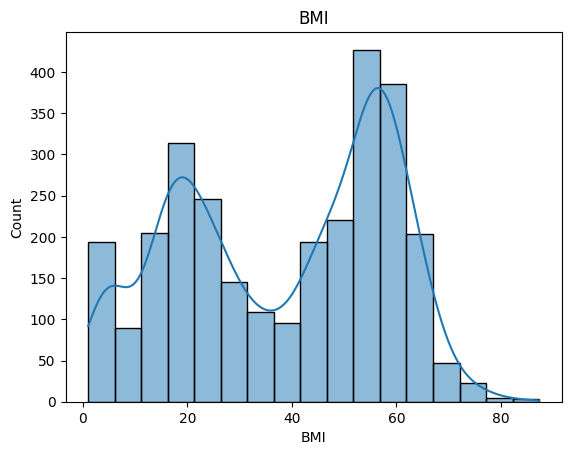

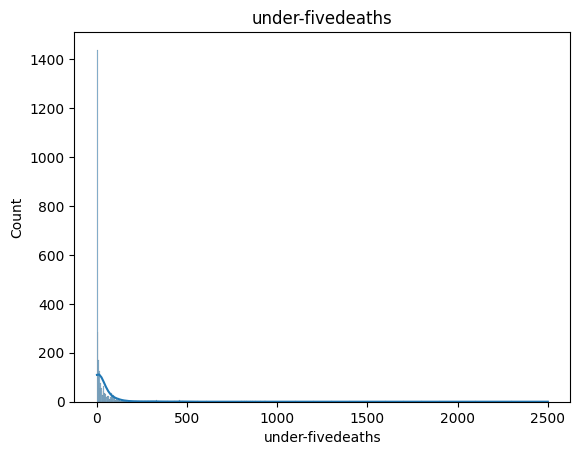

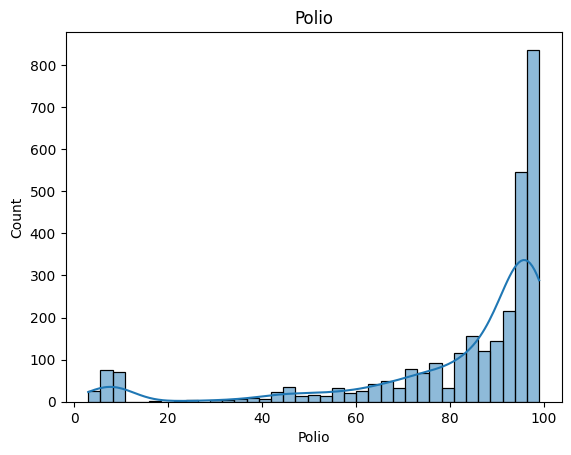

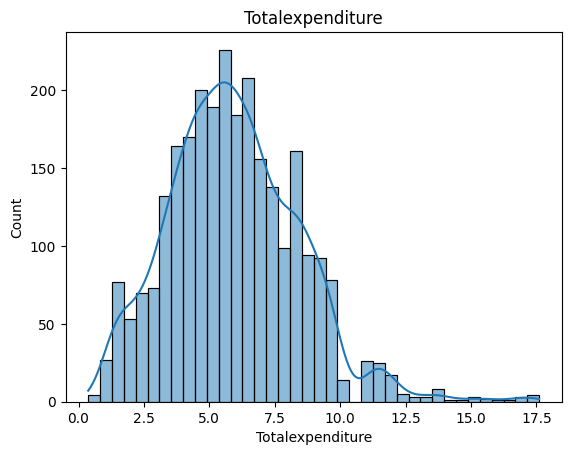

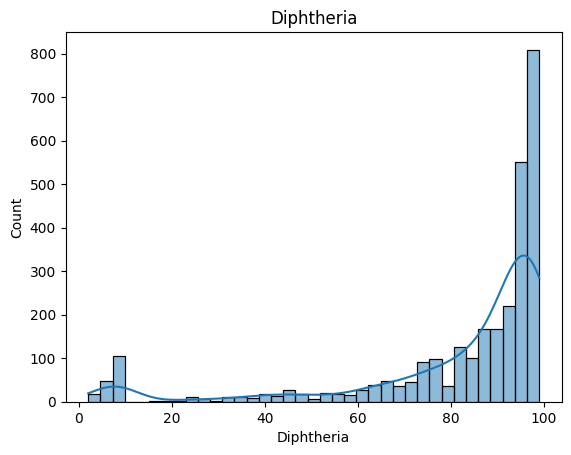

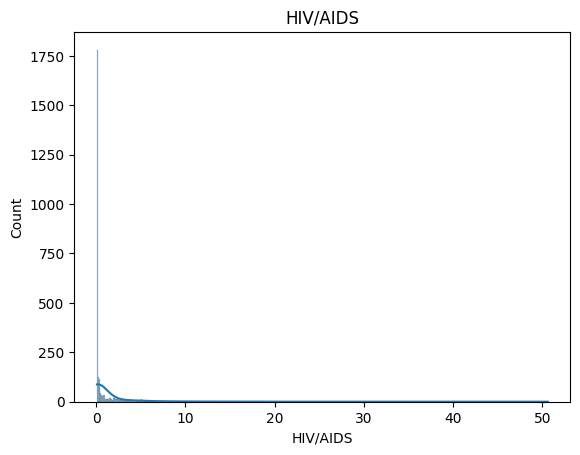

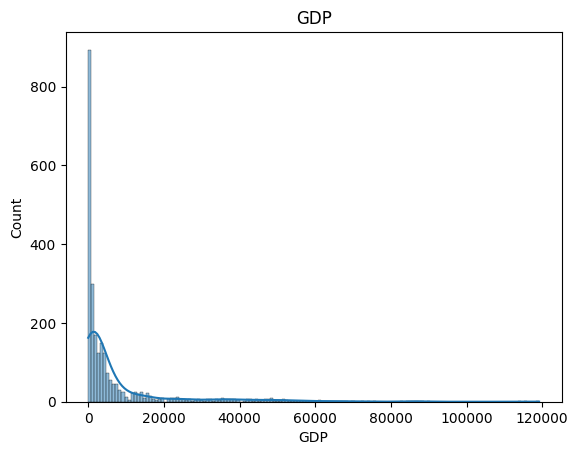

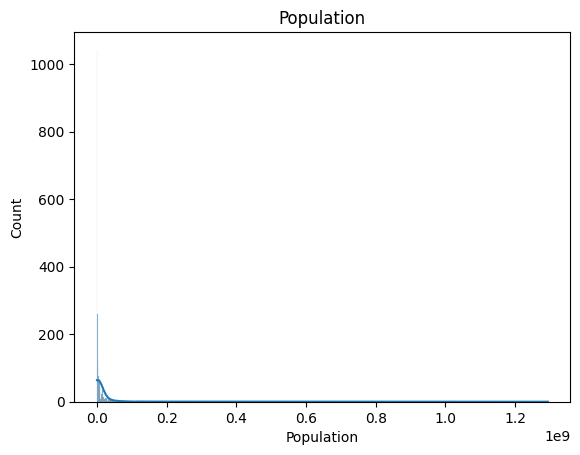

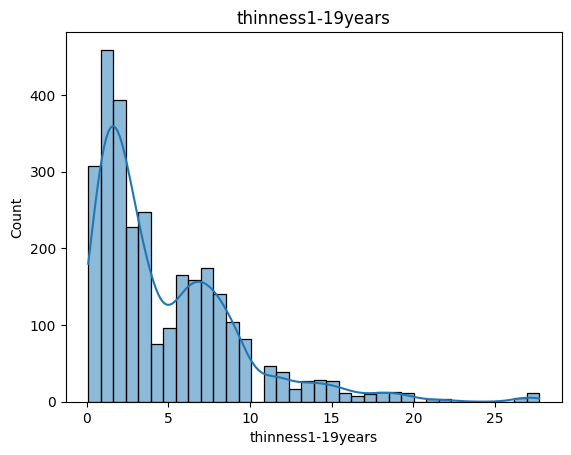

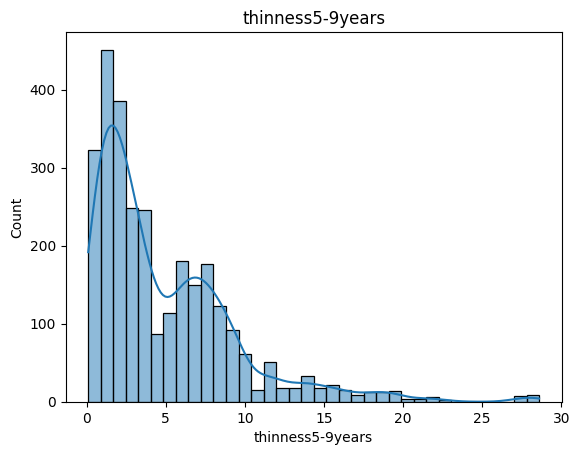

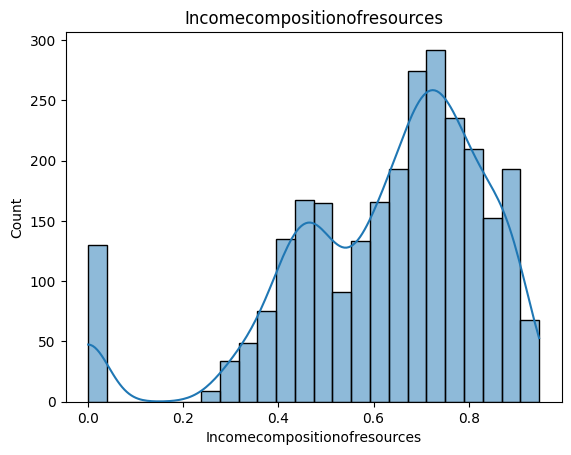

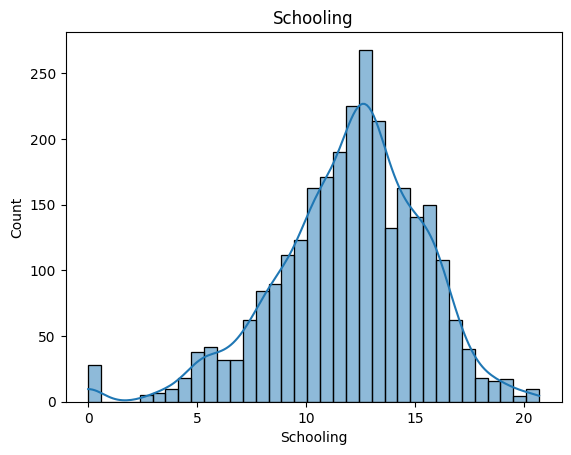

In [14]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.histplot(x=col,data=df,kde=True)
        plt.title(col)
        plt.show()

In [15]:
# Lets go with the mean and fill all the missing values in each column with the column means:
for col in null_list:
    df[col]=df[col].fillna(df[col].mean(axis=0))

In [16]:
df.isnull().sum()

Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [17]:
df.shape

(2938, 22)

In [18]:
# Since random forest models are not affected by outliers lets not remove the outliers:

In [19]:
# Lets also not reduce the number of features since it seems that random forest can handle 21 features easily.
# Also removing features may also lead to a slight loss of information.

In [20]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col]=le.fit_transform(df[col])        

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   int32  
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   int32  
 3   Lifeexpectancy                2938 non-null   float64
 4   AdultMortality                2938 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

In [23]:
x = df.drop('Lifeexpectancy',axis=1)
y = df['Lifeexpectancy']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=30)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
rfg.score(x_test, y_test) * 100

95.68953995984496

In [28]:
# Since the score seems to be quite good we don't need to do any further processing.
# The accuracy of the model seems prety good.
# But in case if we want to make the model a bit faster we might use PCA for dimensionality reduction and try if we
# get the same accuracy or less. So, note removing the outliers didn't affect our model. This is also something 
# we should exploit from RF models to get more accurate results.